In [2]:
###########################################################################################################
#Classification of Cifar-10 dataset using classical algorithms
###########################################################################################################

#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

import pickle

In [ ]:
#loading the cifar-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']
#normalising the array values
X_train = X_train / 255.0
X_test = X_test / 255.0
#separating the classes 
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)
#reshaping the x arrays from 4D to 2D 
X_train=X_train.reshape(50000,3072)
X_test=X_test.reshape(10000,3072)

In [39]:
#Fitting the data into decision tree classifier
#You do not need to run this cell to train the model as I have provided the pickle file which already
#contains the trained model
from sklearn import tree
clf1=tree.DecisionTreeClassifier()
clf1.fit(X_train,y_cat_train)
pickle.dump(clf1,open('cifar10_model(dc).p','wb'))


In [36]:
#loading the pickle data
dc_model=pickle.load(open('cifar10_model(dc).p','rb'))

In [41]:
#classification report of decision tree classifier
print("Decision Tree:")
y_pred1=dc_model.predict(X_test)
print(classification_report(y_cat_test,y_pred1))

Decision Tree:
              precision    recall  f1-score   support

           0       0.33      0.34      0.34      1000
           1       0.27      0.26      0.27      1000
           2       0.21      0.22      0.21      1000
           3       0.19      0.19      0.19      1000
           4       0.22      0.23      0.22      1000
           5       0.21      0.21      0.21      1000
           6       0.28      0.28      0.28      1000
           7       0.28      0.27      0.27      1000
           8       0.37      0.39      0.38      1000
           9       0.30      0.28      0.29      1000

   micro avg       0.27      0.27      0.27     10000
   macro avg       0.27      0.27      0.27     10000
weighted avg       0.27      0.27      0.27     10000
 samples avg       0.27      0.27      0.27     10000



In [42]:
#As you can see the presion of decision tree classifier is pretty bad among all the classes

In [43]:
#Fitting the data into random forest classifier
#You do not need to run this cell to train the model as I have provided the pickle file which already
#contains the trained model
from sklearn.ensemble import RandomForestClassifier
clf2=RandomForestClassifier()
clf2.fit(X_train,y_cat_train)
pickle.dump(clf2,open('cifar10_model(rf).p','wb'))


In [10]:
#loading the pickle data
rf_model=pickle.load(open('cifar10_model(rf).p','rb'))

In [45]:
#classification report of random forest classifier
print("Random Forest:")
y_pred2=rf_model.predict(X_test)
print(classification_report(y_cat_test,y_pred2))

Random Forest:
              precision    recall  f1-score   support

           0       0.81      0.24      0.37      1000
           1       0.98      0.05      0.09      1000
           2       0.73      0.02      0.03      1000
           3       1.00      0.00      0.00      1000
           4       0.80      0.02      0.05      1000
           5       0.90      0.04      0.08      1000
           6       0.78      0.05      0.09      1000
           7       0.93      0.05      0.10      1000
           8       0.85      0.26      0.40      1000
           9       0.90      0.07      0.13      1000

   micro avg       0.85      0.08      0.15     10000
   macro avg       0.87      0.08      0.13     10000
weighted avg       0.87      0.08      0.13     10000
 samples avg       0.08      0.08      0.08     10000



D:\Downloads\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
#As you can see our random forest classifier is very precise for some classes(ex: 96% for class 1)
#but also very bad at predicting like class 3 (0%)
###########################################################################################################

In [8]:
#testing a brand new single image
from skimage.io import imread
import skimage
import numpy as np
import cv2
url=input("Enter the path of the image you want to try:")
img=imread(url)
img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
img_rf=skimage.transform.resize(img,output_shape=(32,32,3))
img_rf=img_rf.reshape(1,3072)

Enter the path of the image you want to try:D:\Downloads\61e9d40c4ff4c6588a370dad_61e40eeded304ae441050e4b_Screenshot20at%2012.26.01.png


Predicted output: deer


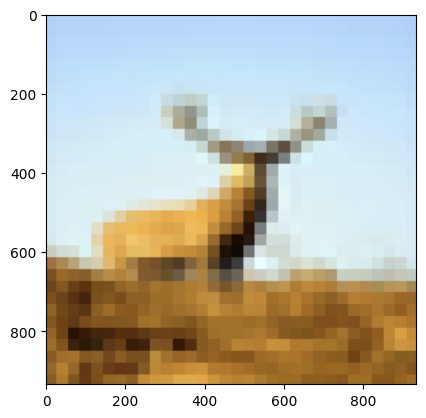

In [37]:
arr=dc_model.predict(img_rf)
print
for i in range (0,10):
    if arr[0][i]==1:
        print("Predicted output:",labels[i])
        break;
plt.imshow(img)